# Cross-entropy explination

This is largely inspired by: [blog 1](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) and [blog 2](https://machinelearningmastery.com/cross-entropy-for-machine-learning/#:~:text=Where%20H()%20is%20the,*%20log(Q(x))).


Let us consider a clasification problem, there is a single contiuous feature $x$ that is used as a predictor for a target variable $y\in{0,1}$.

This is an example of a classification problem, and so how do we get a function of $x$ that outputs a discreat prediction $\hat y$?

To begin let us make an example data set. 

In [32]:
import numpy as np

np.random.seed(46)

no_points = 30
x = -1 + 2 * np.random.rand(no_points)
noise = 0.5 * np.random.rand(no_points)

y = np.arctan(x+noise)
foo = np.vectorize(lambda value: 1 if value > 0 else 0)
y = foo(y)

print(x,'\n',y)

[ 0.5676647   0.26966741 -0.50191382  0.51615173 -0.37384613  0.87447471
 -0.9142691  -0.11826559  0.82544458 -0.08999216  0.01586868 -0.83018409
 -0.14730042  0.49143392  0.73416279 -0.35266835 -0.79185121  0.60421609
 -0.2103361   0.25553618 -0.92802291 -0.4001843  -0.90469356 -0.25557784
 -0.47516961  0.98105241 -0.2097093  -0.38492147 -0.55779773 -0.01194995] 
 [1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1]


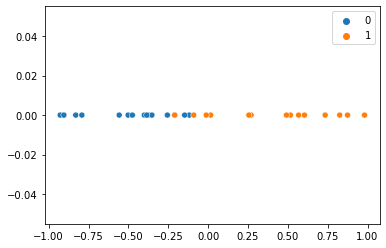

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot( x = x, y = [0] * x.shape[0], hue = y)
plt.show()

The problem is given the value of $x$ can we predict the value of $y$ and with what certanty can we do so. As set up, we know the more posative the value the more likly it is to be 1 and the more negative the more likely to be 0. 

We could fit a model to do so, splitting at exactly 0, but how good would the model be?

For such classification problems, one uses the binary cross-entropy on the predicted probabilities $p$ and their true distribution $q$ for the values $y$. 

A measure of the information held in a distribution $q$ is in its entropy, 

$H(q) = - \sum q(y_i) \log (q(y_i))$.

If the distribution would predict 50/50 for all values of $y_i$, then this is maximized, while if a distibution was cetain in all cases, it would be minimized. In this sence, the entropy measures how 'flat' a distribution is. 

However, we do not have access to the true distribution $q(y_i)$ for the variable $y$, rather we have a sample distribution $p(y_i)$.

We could instead find the [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy) of the two distributions:

$H_p(q) = - \sum q(y_i) \log (p(y_i))$.

If we were to take the diference of the entropy and the cross entropy, we would find $H_p - H \geq 0$. This diference is known as the [KL Divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence),

$\sum q(y_i) (\log (q(y_i) / p(y_i))$

and is obviusly minimized when $q=p$ and so our goal should be to minimize it.

# The Trick

We do not know the probability distribution for the outputs $y$, but we do not need it!

Rather than the probability distribution that gives $y$ its value (should $y$ be a random variable), we consider a new distribution, which for all $x_i$ gives the output $y_i$ a 100% probability and all other posible values 0%. 

Denote this distribution $\hat q$

In so doing we have 

$\sum \hat q(y_i) \log (\hat q(y_i) / p(y_i)) = - \log (p(y_true))$